In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape_

# 2. A naive prediction of the future

In [33]:
jj = pd.read_csv("https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/jj.csv")
jj['date'] = pd.to_datetime(jj['date'])
jj['year'] = jj['date'].dt.year
jj.tail()

,date,data,year
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980
83,1980-10-01,11.61,1980


In [20]:
jj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    84 non-null     datetime64[ns]
 1   data    84 non-null     float64       
 2   year    84 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 1.8 KB


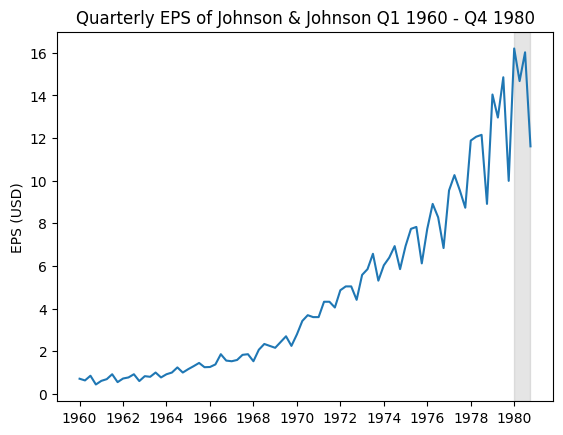

In [ ]:
fig, ax = plt.subplots()
ax.plot(jj['date'], jj['data'])
ax.set_ylabel("EPS (USD)")
ticks = [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in ticks]))
ax.set_xticklabels(ticks)
ax.set_title("Quarterly EPS of Johnson & Johnson Q1 1960 - Q4 1980")
start = pd.to_datetime("1980-01-01")
end = pd.to_datetime("1980-10-01")
ax.axvspan(start, end, color = "grey", alpha = 0.2)


In [50]:
# Media aritrmética 1960-1979
jj.iloc[:-4,1].mean().round(2)

4.31

In [55]:
# EPS 1Q-1979
jj.iloc[76,1]

14.04

In [58]:
train = jj.iloc[:-4]
test  = jj.iloc[-4:]

In [59]:
# Media histórica
train['data'].mean().round(2)

4.31

In [62]:
test.loc[0:,'pred_mean'] = train['data'].mean().round(2)

In [85]:
# MAPE
print("MAPE:", 100*mape_(test['data'],test['pred_mean']))


MAPE: 69.9970838624719


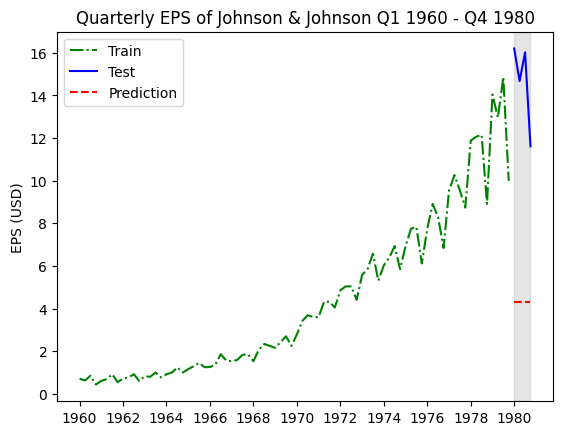

In [91]:
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Prediction')

ax.set_ylabel("EPS (USD)")
ticks = [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in ticks]))
ax.set_xticklabels(ticks)
ax.set_title("Quarterly EPS of Johnson & Johnson Q1 1960 - Q4 1980")
start = pd.to_datetime("1980-01-01")
end = pd.to_datetime("1980-10-01")
ax.axvspan(start, end, color = "grey", alpha = 0.2)
ax.legend()


In [98]:
last_year_mean = train.iloc[-4:, 1].mean()
last_year_mean

12.96

In [116]:
test.loc[:,'pred_last_yr_mean'] = last_year_mean

In [109]:
# MAPE
print("MAPE:", 100*mape_(test['data'], test['pred_last_yr_mean']))

MAPE: 15.5963680725103


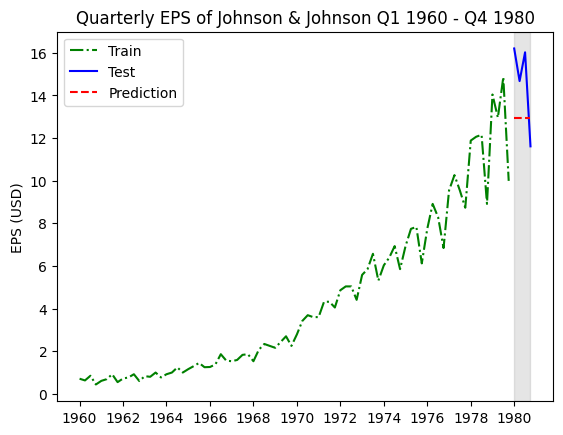

In [110]:
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Prediction')

ax.set_ylabel("EPS (USD)")
ticks = [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in ticks]))
ax.set_xticklabels(ticks)
ax.set_title("Quarterly EPS of Johnson & Johnson Q1 1960 - Q4 1980")
start = pd.to_datetime("1980-01-01")
end = pd.to_datetime("1980-10-01")
ax.axvspan(start, end, color = "grey", alpha = 0.2)
ax.legend()

In [114]:
last=train.data.iloc[-1]
last

9.99

In [ ]:
test.loc[:, 'pred_last'] = last

In [120]:
# MAPE
print("MAPE:", 100*mape_(test['data'], test['pred_last']))

MAPE: 30.457277908606535


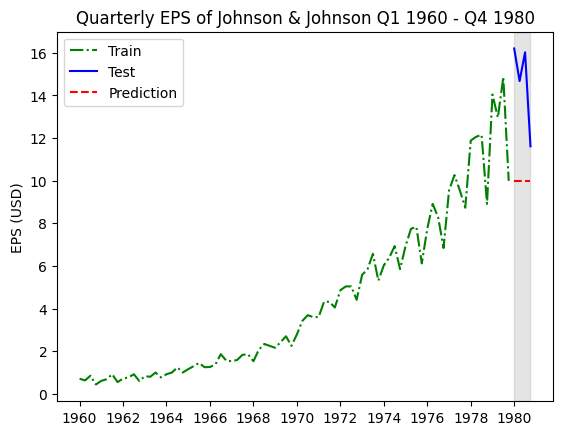

In [121]:
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Prediction')

ax.set_ylabel("EPS (USD)")
ticks = [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in ticks]))
ax.set_xticklabels(ticks)
ax.set_title("Quarterly EPS of Johnson & Johnson Q1 1960 - Q4 1980")
start = pd.to_datetime("1980-01-01")
end = pd.to_datetime("1980-10-01")
ax.axvspan(start, end, color = "grey", alpha = 0.2)
ax.legend()

In [ ]:
test.loc[:,'pred_last_season'] = train.data[-4:].values

# MAPE
print("MAPE:", 100*mape_(test['data'], test['pred_last_season']))


MAPE: 11.561658552433654


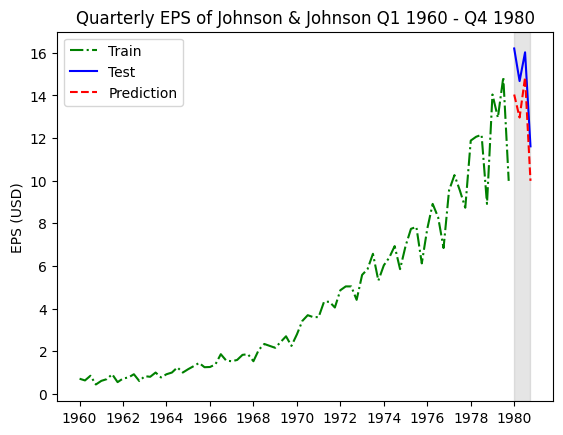

In [136]:
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Prediction')

ax.set_ylabel("EPS (USD)")
ticks = [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in ticks]))
ax.set_xticklabels(ticks)
ax.set_title("Quarterly EPS of Johnson & Johnson Q1 1960 - Q4 1980")
start = pd.to_datetime("1980-01-01")
end = pd.to_datetime("1980-10-01")
ax.axvspan(start, end, color = "grey", alpha = 0.2)
ax.legend()

In [156]:
test

,date,data,year,pred_mean,pred_lat_yr_mean,pred_last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,1980,4.31,12.96,12.96,9.99,14.04
81,1980-04-01,14.67,1980,4.31,12.96,12.96,9.99,12.96
82,1980-07-02,16.02,1980,4.31,12.96,12.96,9.99,14.85
83,1980-10-01,11.61,1980,4.31,12.96,12.96,9.99,9.99


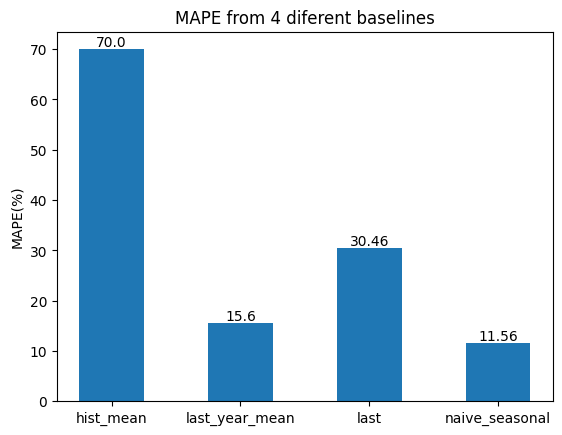

In [158]:
#MAPEs
mape_hist_mean = (100*mape_(test['data'],test['pred_mean'])).round(2)
mape_last_year = (100*mape_(test['data'],test['pred_last_yr_mean'])).round(2)
mape_last =      (100*mape_(test['data'],test['pred_last'])).round(2)
mape_last_season =      (100*mape_(test['data'],test['pred_last_season'])).round(2)

mapes = [mape_hist_mean, mape_last_year, mape_last, mape_last_season]

fig, ax = plt.subplots()
ax.bar([0,1,2,3], mapes, width=0.5)
ax.set_xticks([0,1,2,3], ["hist_mean", 'last_year_mean', 'last', 'naive_seasonal'])
ax.set_title("MAPE from 4 diferent baselines")
ax.set_ylabel('MAPE(%)')

for i in range(4):
    ax.text(i,mapes[i]+0.5,mapes[i], horizontalalignment='center')




# 3. Going on a random walk